<a href="https://colab.research.google.com/github/smriti192002/Zomato-Recommendation-System/blob/main/Zomato_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Title: Zomato Restaurant Recommendation system***

# *Problem Description*

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for Hyderabad city of India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also need to build a recommendation system for zomato to recommend the alike restaurants given the restaurant name based on user reviews 

# *Installing necessary modules*

In [1]:
#installing necessary libraries
!pip install emoji
!pip install nbinteract
!pip install gitly==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=f57ca012656a37637bbbe6ad39b8d3f61a702968c323e79166fd71290c4b850a
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.8/155.8 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# *Importing necessary libraries*

In [2]:
#importing bascic preproceessing libraries 
import numpy as np 
import pandas as pd
import math 
from scipy import stats
import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#importing basic visualiation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#string and regular pattern libraries
import regex as re
import string

#nlp libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import linear_kernel
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#warning libraries
import warnings
warnings.filterwarnings("ignore")
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


# *Reading and Enquiring a datasets*

In [3]:
#mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading a resturant data
restaurant_data=pd.read_csv('/content/drive/MyDrive/Datascience/Datasets/Zomato Restaurant names and Metadata.csv')

#reading resturant review data
restaurant_review = pd.read_csv('/content/drive/MyDrive/Datascience/Datasets/Zomato Restaurant reviews.csv')

### *Data Dictionary and info of Resturant Data*

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

In [5]:
#checking first 10 rows of data 
restaurant_data.head(10)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,"1,000","Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."


In [6]:
#checking the shape of the data 
print('Shape of restaurant data is : ', restaurant_data.shape)

Shape of restaurant data is :  (105, 6)


In [7]:
#checking for the info of data 
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


### *Data Dictionary and info of Review Data*

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review.

In [8]:
#checking first 5 rows of review data 
restaurant_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [9]:
#checking the dimension of the data 
print('Shape of review data is :', restaurant_review.shape)

Shape of review data is : (10000, 7)


In [10]:
#info of variables of review data
restaurant_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# *Null Value treatment*

## *Null value treatment in Restaurant Data*

In [11]:
#checking null values on data
restaurant_data.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

*We have 54 null values in collections and 1 in timings.It Seems like there are 54 resturant thats not present in any of the collections offered by zomato* 

In [12]:
#checking for the subdataframe having data of resturants where collection has a null value
restaurant_data[restaurant_data['Collections'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,"1,000",NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr..."
28,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


*Zomato offers a specific kind of collections on their application and it puts various restaurants under each collection. So for the resturants having Null values in collections are those restaurants that doesn't come under any collections. As of now we impute NIC in place of null values stating not in collection to identify the restaurants which are not part of any collection.*

In [13]:
#filling null value of collection in restaurant data 
restaurant_data['Collections'].fillna('NIC', inplace = True)

*Checking for null values in timings. It seems like for 1 restaurant we doesn't have opening and closing time. For this we will check the timing that is more common among different restraurants and will place that timing*

In [14]:
#checking for different values of timings and number of time it is appeared
restaurant_data['Timings'].value_counts() 

11 AM to 11 PM                                                                                                                                                              6
12 Noon to 11 PM                                                                                                                                                            5
12 Noon to 12 Midnight                                                                                                                                                      5
12 Noon to 10:30 PM                                                                                                                                                         3
11:30 AM to 1 AM                                                                                                                                                            3
                                                                                                                                  

*It seems that the timing between 11 AM to 11 PM is most frequent. We will impute this in missing value*

In [15]:
#imputing null value in timing columnn of restaurant data 
restaurant_data['Timings'].fillna('11 AM to 11 PM', inplace = True)

## *Null value treatment in Review Data*

In [16]:
#checking a null values in review data 
restaurant_review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

*There seems to be a pattern in missing data If we see that the reviewer, rating, metadata and time all have same that is 38 null values and also in review we have 45 that is few values greater than reviewer missing value. Lets see if these all values are missing at the same places*

In [17]:
#preparing sub data with reviewer as null 
null_review_data = restaurant_review[restaurant_review['Reviewer'].isnull()]

In [18]:
#checking other columns of null reviewer data 
null_review_data.isnull().sum()

Restaurant     0
Reviewer      38
Review        38
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [19]:
#checking the different values and their counts of pictures column of null data  
null_review_data['Pictures'].value_counts()

0    38
Name: Pictures, dtype: int64

*So We can see that except resturant and pictures all other columns have 38 null values at the same place. So there is a complete data miss at this place*

In [20]:
#checking resturant names of null data 
null_review_data

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [21]:
#checking for unique values in rating column of review data
restaurant_review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [22]:
#checking the review content where rating is like 
restaurant_review[restaurant_review['Rating'] == 'Like']['Review']

7601    One of the best pizzas to try. It served with ...
Name: Review, dtype: object

*With the review text it seems like the user giving like in rating seems to be very happy with the food. So we will try to impute 4 in rating column in place of like.* 

In [23]:
#replacing like with 4 
restaurant_review.loc[restaurant_review["Rating"] == "Like", "Rating"] = '4'

In [24]:
#changing datatype of rating from object to float64
restaurant_review['Rating'] = restaurant_review['Rating'].astype('float64')

In [25]:
# Finding the average rating for American Wild Wings restaurant 
american_wings_rating = round(restaurant_review[restaurant_review['Restaurant'] == 'American Wild Wings']['Rating'].mean(),0)

# Finding the average rating for Arena Eleven restaurant 
arena_eleven_rating = round(restaurant_review[restaurant_review['Restaurant'] == 'Arena Eleven']['Rating'].mean(),0)

In [26]:
# Iterate through each row of the restaurant_review dataframe

for i in range(len(restaurant_review)):
  # Check if the current row's restaurant is American Wild Wings
  if restaurant_review['Restaurant'].iloc[i] == 'American Wild Wings':

    # If so, fill any empty rating values with the average rating for American Wild Wings
    restaurant_review['Rating'].fillna(american_wings_rating,inplace=True)
    
  # Check if the current row's restaurant is Arena Eleven
  elif restaurant_review['Restaurant'].iloc[i] == 'Arena Eleven':

    # If so, fill any empty rating values with the average rating for Arena Eleven
    restaurant_review['Rating'].fillna(arena_eleven_rating,inplace=True)

In [27]:
# Fill any empty values in the Reviewer column with "Anonymous"
restaurant_review['Reviewer'].fillna('Anonymous', inplace = True)

# Fill any empty values in the Metadata column with "0 reviews, 0 followers"
restaurant_review['Metadata'].fillna('0 reviews,0 followers', inplace = True)

# Fill any empty values in the Time column with the mode of the column
restaurant_review['Time'].fillna(restaurant_review['Time'].mode()[1], inplace = True)

In [28]:
#checking for null value in review column 
restaurant_review[restaurant_review['Review'].isnull()].head(4)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5.0,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5.0,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5.0,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5.0,1 Review,7/8/2018 21:19,0


In [29]:
# Define a dictionary of reviews
food_review={5:'very good and delicious food',4:'food was good', 3 : 'food is kind of average only',
             2 : 'food taste was not good at all', 1 : 'worst food and service'}

# Define function to impute missing reviews
def imputing_review(review,rating):
  
  # Check if the review is missing or not a string
  if type(review)!=str:
    
    if pd.isna(review):
      # Return the review corresponding to the rating from food_review dictionary 
      return food_review[rating]
  
  # If the review is not missing, return it as is
  return review

#applying above designed function to impute the missing values in review column
restaurant_review['Review'] = restaurant_review.apply(lambda x: imputing_review(x['Review'],x['Rating']),axis=1)

In [30]:
#info of the restaurant_review data 
restaurant_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    10000 non-null  object 
 2   Review      10000 non-null  object 
 3   Rating      10000 non-null  float64
 4   Metadata    10000 non-null  object 
 5   Time        10000 non-null  object 
 6   Pictures    10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


## *Duplicate Checks*

In [31]:
#checking duplicates in restaurant data
print('Duplicate rows in restaurant Data : ',restaurant_data.duplicated().sum())

Duplicate rows in restaurant Data :  0


In [32]:
#checking duplicates in review data
print('Duplicate rows in review Data : ',restaurant_review.duplicated().sum())

Duplicate rows in review Data :  36


# *Exploratory Data Analysis*

### *Data type conversions and value checks in restaurant and review data*

In [33]:
#checking info of datatypes of all variables in review data 
restaurant_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    10000 non-null  object 
 2   Review      10000 non-null  object 
 3   Rating      10000 non-null  float64
 4   Metadata    10000 non-null  object 
 5   Time        10000 non-null  object 
 6   Pictures    10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [34]:
#checking info of datatypes of all variables in restaurant data 
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  105 non-null    object
 4   Cuisines     105 non-null    object
 5   Timings      105 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [35]:
#we have a variable like 1,300 in our data so in order to convert it into float we are removing this comma 
restaurant_data['Cost'] = restaurant_data['Cost'].str.replace(',','')

In [36]:
#datatype conversion of cost from object to float64 
restaurant_data['Cost'] = restaurant_data['Cost'].astype('float64')

In [37]:
#function designed to remove whitespaces from data of columns

def cleaning_spaces(data):
  '''This function takes text data as input converts the text into lower case and remove unnecessary whitespaces'''

  #spliting a string data 
  data = data.split(',')
  
  #list to store clean data   
  clean_data =[]
  
  #iterating over each elements in data list and removinng whitespaces 
  for elem in data:
    #appending a clean stripped data into clean list 
    clean_data.append(elem.lower().strip())

  #converting clean data back to string   
  clean_data = ','.join(clean_data)

  #returning clean data
  return clean_data

In [38]:
#removing unnecessary spaces from collections and cuisines from restaurant data 
restaurant_data['Collections'] = restaurant_data['Collections'].apply(cleaning_spaces)
restaurant_data['Cuisines'] = restaurant_data['Cuisines'].apply(cleaning_spaces)

Data type conversions and value checks has been done and all the data are in place

### *Feature creation in restaurant and review data*

In [39]:
#extracting num of reviews given by users and followers of users from a metadata 

#listing a empty lists to store num of reviews given and followers
num_reviews_given =[]
followers = []

#looping over metadata
for data in restaurant_review['Metadata']:
  #spliting a data by comma as review and followers are separated
  data = data.split(',')
  
  #if data list is of length 2 then it contains both reviews and followers detail 
  if len(data) == 2:

    #stripping unecesssary white spaces from both elements of daata list
    data[0] = data[0].strip()
    data[1] = data[1].strip()
    #apending the number of reviews from element 0 and nuber of followers from element 1 of data list 
    num_reviews_given.append(re.findall(r'(\d+)', data[0])[0])
    followers.append(re.findall(r'(\d+)', data[1])[0])
  else:
    #there can be possibly two elements in a list if two is not there there could be only once
    data[0] = data[0].strip()

    #if follower is in data then follower data is there then append list data to follower and 0 to review
    if 'followers' in data or 'follower' in data:
      followers.append(data[0].split()[0])
      num_reviews_given.append(0)
    
    #else num_of_reviews is in data then review data is there then append list data to review and 0 to follower
    else:
      num_reviews_given.append(data[0].split()[0])
      followers.append(0)

#adding a columns in review data
restaurant_review['num_reviews_given'] = num_reviews_given
restaurant_review['followers'] = followers

#dropping a metadata column as it is no longer required
restaurant_review.drop(columns = ['Metadata'], inplace = True)

In [40]:
#top 5 rows of restaurant data
restaurant_review.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,num_reviews_given,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2


### *Creating average rating feature of restaurant in restaurant data*  

In [41]:
#creating a rating df from review data that will contain average rating of each restaurant 
rating_df = restaurant_review.groupby('Restaurant').aggregate({'Rating' : 'mean'}).rename(columns={'Rating':'avg_rating'})

#merging a rating df with restaurant data on restaurant name 
restaurant_data = pd.merge(restaurant_data, rating_df, how = 'left', left_on= 'Name', right_on= 'Restaurant')

In [42]:
#checking info on restaurant data
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         105 non-null    object 
 1   Links        105 non-null    object 
 2   Cost         105 non-null    float64
 3   Collections  105 non-null    object 
 4   Cuisines     105 non-null    object 
 5   Timings      105 non-null    object 
 6   avg_rating   100 non-null    float64
dtypes: float64(2), object(5)
memory usage: 6.6+ KB


*We got 5 null values introduced in avg_rating that means we do not have any reviews for these 5 restaurants in our review data. Lets ceck on these restaurants names*

In [43]:
#checking the names and detail of the restaurant who has average rating as null
restaurant_data[restaurant_data['avg_rating'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings,avg_rating
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600.0,nic,"fast food,salad",11 AM to 11 PM,NaN
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200.0,nic,"bakery,mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",NaN
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500.0,nic,"north indian,biryani,chinese",12 Noon to 11 PM,NaN
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250.0,nic,fast food,8am to 12:30AM (Mon-Sun),NaN
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,1700.0,pan-asian delicacies,"thai,asian,chinese,malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight",NaN


*It seems like we don't have any reviews for these restaurants so there is no data for these restaurant in review data. So we will fill average rating with 0 as there is no rating for these restaurant*

In [44]:
#filling average rating of the restaurant who has avg rating as null with 0 
restaurant_data.fillna(0,inplace = True)

*We are done with feature creation*

In [45]:
#function designed to get a unique list of item from a list containing duplicates 
def unique_extract(list1):
  '''This function takes list as an input and returns a list of its unique value'''
  unique_value=[]
  for i in list1:
    if i not in unique_value:
      unique_value.append(i)
  return unique_value


#function designed to return the list with removal of whitespaces 
def stripping(data):
  '''This function takes list as an input and returns a list of removed unnecessary steps'''
  strip_data = []
  for elem in data:
    strip_data.append(elem.strip())
  return strip_data

## *Word cloud for Restaurants restaurants*

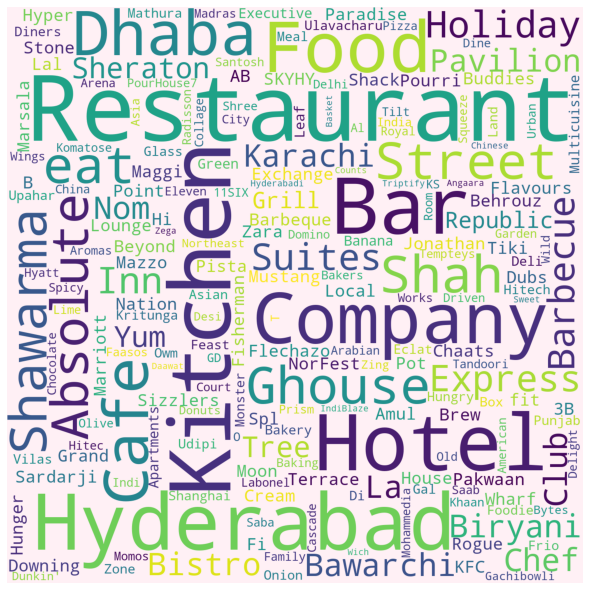

In [46]:
# Extracting unique names of restaurants
Rests = restaurant_data.Name.unique()

# Creating a string of all restaurant names
rest_string = ' '
for i in Rests:
  rest_string = rest_string+i+' '

# Generating a wordcloud of the restaurant names
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 12).generate(rest_string) 

# Creating a figure and displaying the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## *Cuisine Related analysis*

#### *Hottest Cuisines in Hyderabad*

In [47]:
''''Popular cuisine has been decided on the basis of number of restaurants offering that particular cuisine.
A cuisine appearing in most of the restaurants will be rated as most popular cuisines'''

# collecting the cuisines list of all the restaurant and checking most appeared cusine
cuisines=restaurant_data['Cuisines'].apply(lambda x: (x.split(',')))

#empty list to extend 
cuisines_list = []

#extending all the lists from cuisines in cuisines_list
for cuisine in cuisines:
  cuisines_list.extend(cuisine)

Text(0.5, 1.0, 'Cuisines Present in number of restaurant')

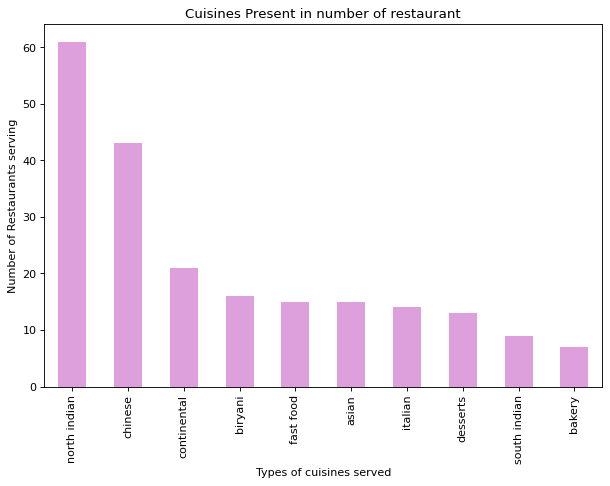

In [48]:
#creating a canvas/figure for plot
figure(figsize=(9, 6), dpi=80)

#converting cuisines_list to series and then getting the value_counts of different cuisines and indexing top 10 
no_of_cuisines=pd.Series(cuisines_list).value_counts()[0:10]

#ploting bar plot for top 10 cuisines
no_of_cuisines.plot.bar(color='plum')

#labelling x and y axis and giving title to plot
plt.xlabel('Types of cuisines served')
plt.ylabel('Number of Restaurants serving')
plt.title('Cuisines Present in number of restaurant')

*North Indian Cuisines seems to be most popular among the restaurants. Nearly 60 restaurants out of 105 restaurants is serving north indian cuisines and then chineese takes the place*

#### *Average price of different cuisines*

In [49]:
#removing duplicates and extracting unique cuisines offered by restaurants
unique_cuisines = unique_extract(cuisines_list)

#empty dictionary to store cuisines and their prices
cuisine_price={}

#looping over each unique cuisines and making empty list as value 
for cuisine in unique_cuisines:
  cuisine_price[cuisine]=[]

#looping over each restaurant data
for i in range(len(restaurant_data)):
    
    #spliting cuisines of each restaurant splitted by commas
    cuisine_list=restaurant_data.iloc[i]['Cuisines'].split(',')
    
    #adding a cost of each cuisines of restaurants
    for cuisine in cuisine_list:
      cuisine_price[cuisine].append(restaurant_data.iloc[i]['Cost'])

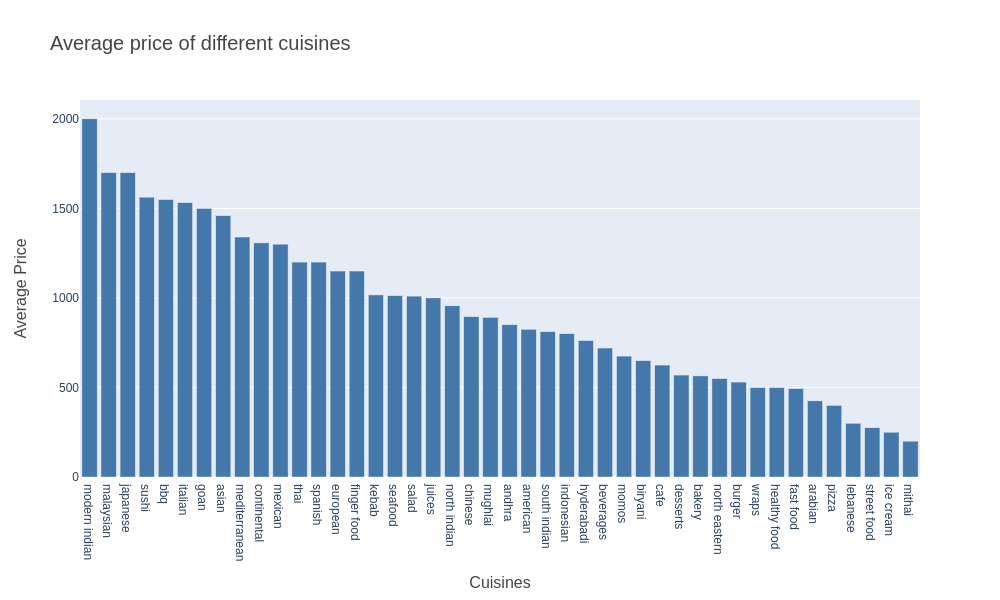

In [66]:
# create an empty list to store average price of each cuisine
average_price=[]

# loop through the prices of each cuisine and take average prices
for price in cuisine_price.values():
  
  # calculate average price by summing all prices and dividing by the number of prices and add the calculated average price to the list
  average_price.append(round(sum(price)/len(price),2))

# create a dictionary with cuisine names as keys and average prices as values
cusine_avg_price = dict(zip(list(cuisine_price.keys()),average_price))

# convert the dictionary to a Pandas Series object, sort the values in descending order, and convert it back to a dictionary
cuisine_avg_price_series = pd.Series(cusine_avg_price).sort_values(ascending = False)
cusine_avg_price  = dict(cuisine_avg_price_series)

# create a bar chart using the Plotly library
fig = go.Figure(data=[go.Bar(x=list(cusine_avg_price.keys()), y=list(cusine_avg_price.values()), marker_color='#4477AA')])
fig.update_layout(width=1300,
    height=500,
    title='Average price of different cuisines',
    title_font_size=20,
    title_font_color='#444444',
    xaxis_title='Cuisines',
    xaxis_title_font_size=16,
    xaxis_title_font_color='#444444',
    yaxis_title='Average Price',
    yaxis_title_font_size=16,
    yaxis_title_font_color='#444444'
)
gitly.config_render('git', default_height = 600, default_width = 1000)
gitly.show( fig )

*The analysis of the data suggests that Modern Indian Cuisine holds the highest average price among all cuisines, around 2000.
Malaysian Cuisine is the second highest, with a slightly lower average price point.*

#### *Highest Rated Restaurant in each Cuisines*

In [51]:
# create a list of restaurant names as keys of the dictionary
keys=list(restaurant_data.Name)

# create a list of lists of cuisines offered by each restaurant as values of the dictionary
values=list(restaurant_data['Cuisines'].str.split(','))

# create the dictionary with keys as restaurant names and values as lists of cuisines offered
cuisines_offered_by_restaurant=dict(zip(keys,values))

In [52]:
#creating an empty list of restaurants and cuisines
restaurants = []
cuisines = []

#iterating over the restaurant and cuisines offered by that restaurant  
for restaurant, restaurant_cuisines in cuisines_offered_by_restaurant.items():

    #iterating over the cuisines offered by that restaurant
    for cuisine in restaurant_cuisines:
      
       #appending the name of the restaurant 
        restaurants.append(restaurant)
        #appending the name of the cuisine
        cuisines.append(cuisine)
        
#creating a dataframe from the restaurant and cuisines list     
df = pd.DataFrame({'Restaurant': restaurants, 'Cuisine': cuisines})

#merging a average rating of each restaurant on df dataframe to get the average rating of each restaurant 
df=pd.merge(df,restaurant_data[['avg_rating','Name']],how='inner',left_on='Restaurant',right_on='Name')

#dropping repeated name column
df.drop(columns='Name',inplace=True)

In [53]:
df

,Restaurant,Cuisine,avg_rating
0,Beyond Flavours,chinese,4.28
1,Beyond Flavours,continental,4.28
2,Beyond Flavours,kebab,4.28
3,Beyond Flavours,european,4.28
4,Beyond Flavours,south indian,4.28
...,...,...,...
308,Wich Please,fast food,0.00
309,Republic Of Noodles - Lemon Tree Hotel,thai,0.00
310,Republic Of Noodles - Lemon Tree Hotel,asian,0.00
311,Republic Of Noodles - Lemon Tree Hotel,chinese,0.00


In [54]:
#group the dataframe by 'Cuisine' column and find the max of 'avg_rating' for each group 
max_rating= df.groupby('Cuisine').agg({'avg_rating':'max'}).reset_index()

#getting the restaurant names of those who has highest rating in spcific cuisines
filtered_data=df.merge(max_rating,how='inner',on=['Cuisine','avg_rating']).sort_values(by='Restaurant',ascending=False)

In [55]:
filtered_data

,Restaurant,Cuisine,avg_rating
9,eat.fit,healthy food,3.200
38,Zing's Northeast Kitchen,north eastern,3.650
41,Zega - Sheraton Hyderabad Hotel,sushi,4.450
31,Urban Asia - Kitchen & Bar,thai,3.650
12,The Lal Street - Bar Exchange,finger food,3.450
30,The Indi Grill,modern indian,4.600
29,The Indi Grill,bbq,4.600
24,The Foodie Monster Kitchen,wraps,3.580
7,The Fisherman's Wharf,seafood,4.220
8,The Fisherman's Wharf,goan,4.220


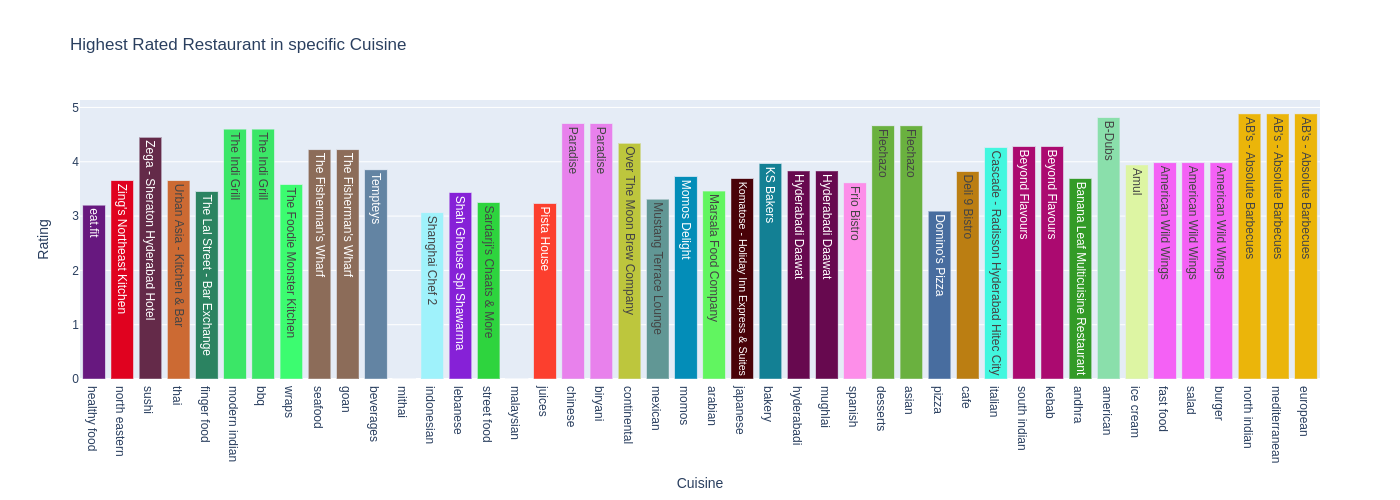

In [77]:
'''plotting the restaurant names that are highest rated in specific cuisines'''

import random
restaurant_colors = {}

# Assign a color to each restaurant
for restaurant in filtered_data['Restaurant']:
    if restaurant not in restaurant_colors:
        # Assign a new color to the restaurant
        restaurant_colors[restaurant] = "rgb(%d, %d, %d)" % (random.randint(0, 256), random.randint(0, 256), random.randint(0, 256))

# Create a list of colors that will be used for the bars in the plot
colors = [restaurant_colors[restaurant] for restaurant in filtered_data['Restaurant']]

# Create the plot
fig = go.Figure(data=[
    go.Bar(x=filtered_data['Cuisine'], y=filtered_data['avg_rating'], text=filtered_data['Restaurant'], marker_color=colors)
])

# Add title and labels
fig.update_layout(title='Highest Rated Restaurant in specific Cuisine', xaxis_title='Cuisine', yaxis_title='Rating')

# Show the plot
gitly.config_render('git', default_height = 500, default_width = 1400)
gitly.show( fig )

*We got the highest rated restaurant in each cuisine - for example If you're looking for the best biryani in town, look no further than Paradise Restaurant*

#### *Cheapest and Expensive Restaurant in Specifuc Cuisines*

In [78]:
#crating a dataframe that consist of cost, cuisine and restaurant name
cheapest_expensive_cuisine=pd.DataFrame({'Restaurant': restaurants, 'Cuisine': cuisines})
cheapest_expensive_cuisine=pd.merge(cheapest_expensive_cuisine,restaurant_data[['Cost','Name']],how='inner',left_on='Restaurant',right_on='Name')

# Drop the 'Name' column from the DataFrame
cheapest_expensive_cuisine.drop(columns='Name',inplace=True)

# Group the rows in the DataFrame by 'Cuisine' and find the minimum 'Cost' for each group, then reset the index
cheapest=cheapest_expensive_cuisine.groupby(['Cuisine']).agg({'Cost':'min'}).reset_index()

# #getting the restaurant name offering minimum cost by merging it to initial created df
cheapest_rest_for_cuisines = cheapest_expensive_cuisine.merge(cheapest,how='inner',left_on=['Cuisine','Cost'],right_on=['Cuisine','Cost'])

# #getting average rating as well for these restaurants
cheapest_rest_for_cuisines=cheapest_rest_for_cuisines.merge(restaurant_data[['Name','avg_rating']],how='inner',left_on='Restaurant',right_on='Name')

# #dropping duplicate column name
cheapest_rest_for_cuisines.drop(['Name'],axis=1,inplace=True)

#cheapest restaurant frame 
cheapest_rest_for_cuisines.head()

,Restaurant,Cuisine,Cost,avg_rating
0,Beyond Flavours,european,800.0,4.28
1,The Fisherman's Wharf,goan,1500.0,4.22
2,eat.fit,healthy food,500.0,3.20
3,eat.fit,continental,500.0,3.20
4,eat.fit,south indian,500.0,3.20


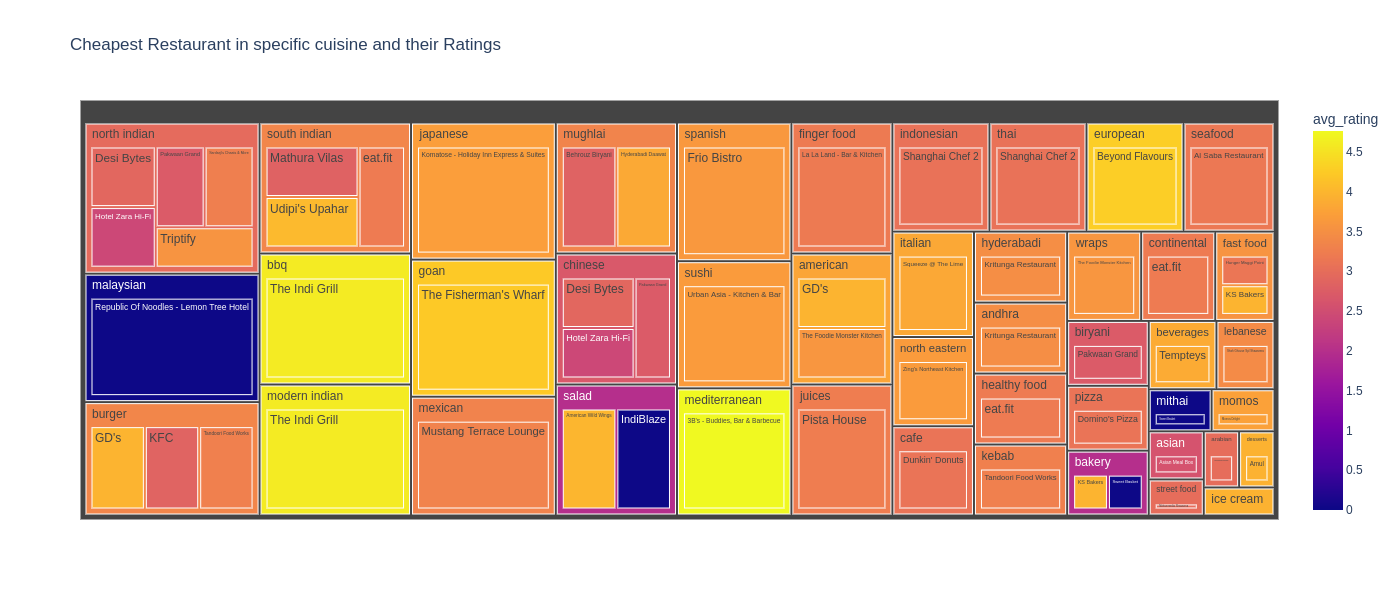

In [80]:
#plotting about cheapest restaurant in specific cuisines
fig = px.treemap(cheapest_rest_for_cuisines, path=['Cuisine', 'Restaurant'], values='Cost'
                  ,color = 'avg_rating',title='Cheapest Restaurant in specific cuisine and their Ratings' )
#to show a figure
gitly.config_render('git', default_height = 600, default_width = 1400)
gitly.show( fig )

Above visualisation shows the list of all the cheapest restaurant in their specific cuisines. Blocks like north indian has multiple restaurant as they all are the cheapest ones(same rates).

Colour distinguishes the rating of these restaurant so if you want to have a north indian in a cheapest restaurant that too highly rated go for Triptify. 

In [81]:
# Group the dataframe by Cuisine and find the max cost for each cuisine and reset the index
expensive=cheapest_expensive_cuisine.groupby(['Cuisine']).agg({'Cost':'max'}).reset_index()

# Merge the cheapest_expensive_cuisine with the expensive dataframe on Cuisine and Cost columns, only include rows with matching values in both dataframe
expensive_rest_cuisine=cheapest_expensive_cuisine.merge(expensive,how='inner',left_on=['Cuisine','Cost'],right_on=['Cuisine','Cost'])

#getting average rating as well for these restaurants
expensive_rest_cuisine =expensive_rest_cuisine.merge(restaurant_data[['Name','avg_rating']],how='inner',left_on='Restaurant',right_on='Name')

#dropping duplicate column name
expensive_rest_cuisine.drop(['Name'],axis=1,inplace=True)

#first 5 rows of the frame 
expensive_rest_cuisine.head()

,Restaurant,Cuisine,Cost,avg_rating
0,Flechazo,desserts,1300.0,4.66
1,The Fisherman's Wharf,seafood,1500.0,4.22
2,The Fisherman's Wharf,goan,1500.0,4.22
3,eat.fit,healthy food,500.0,3.20
4,Shah Ghouse Spl Shawarma,lebanese,300.0,3.43


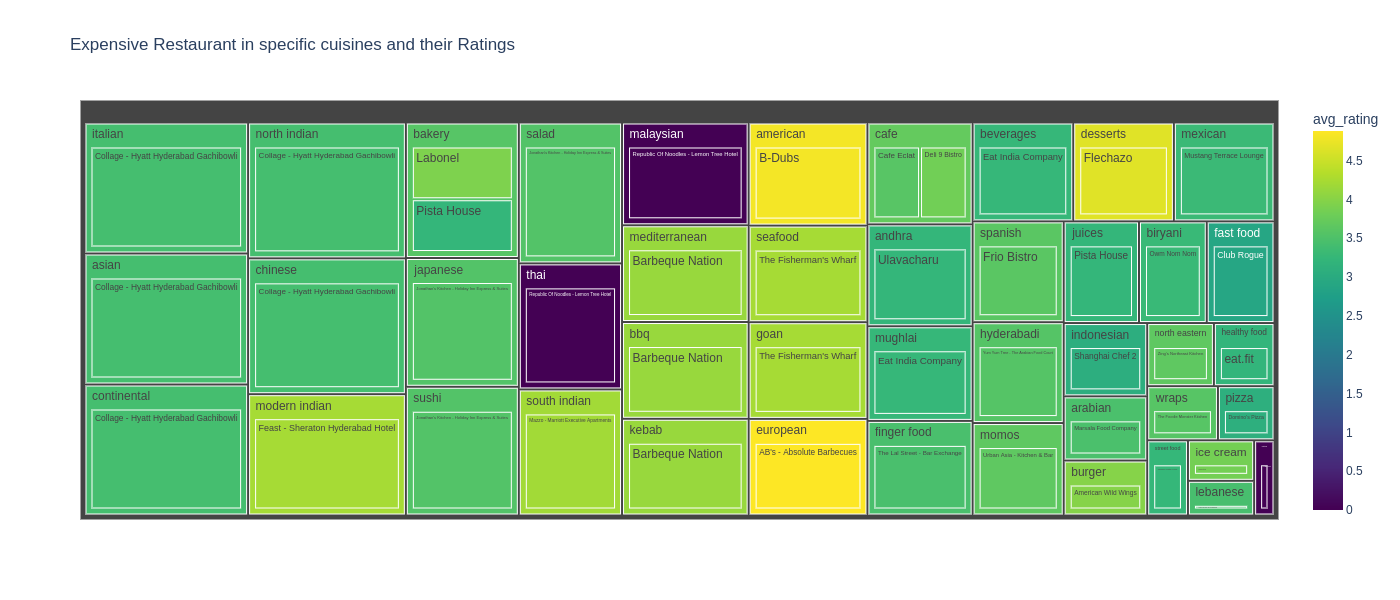

In [82]:
#Creating a treemap visualization showing the expensive restaurant in specific cuisines, their cost and their avg rating using the Plotly Express library
fig = px.treemap(expensive_rest_cuisine, path=['Cuisine', 'Restaurant'], values='Cost',
                 color='avg_rating', title='Expensive Restaurant in specific cuisines and their Ratings',
                 color_continuous_scale=px.colors.sequential.Viridis)

#to show a plot
gitly.config_render('git', default_height = 600, default_width = 1400)
gitly.show( fig )

Above visualisation shows the list of all the expensive restaurant in their specific cuisines. Blocks like north indian has multiple restaurant as they all are the expensive ones(same rates).

Colour distinguishes the rating of these restaurant so if you want to have a bakery in a expensive restaurant that too highly rated go for Labonel. 

## *Cost related analysis*

#### *Cost Distribution among Restaurants*

In [83]:
#runing a describe function 
restaurant_data.describe()

,Cost,avg_rating
count,105.000000,105.000000
mean,861.428571,3.431048
std,510.149730,0.916342
min,150.000000,0.000000
25%,500.000000,3.200000
50%,700.000000,3.590000
75%,1200.000000,3.845000
max,2800.000000,4.880000


[(0.0, 3596.202939934063)]

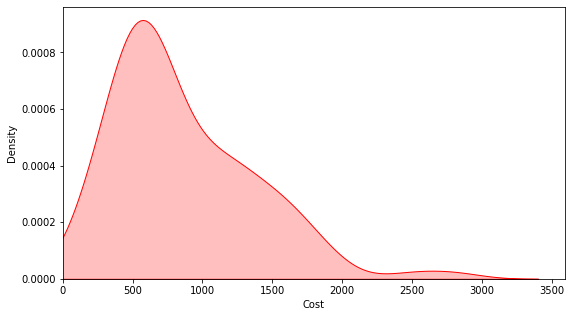

In [84]:
#defining a figure size
figure(figsize=(9, 5))

#distribution plot of cost among different restaurants
sns.kdeplot(restaurant_data['Cost'],fill=True,color='red').set(xlim=(0))

*We can see that peak lies between 250 -1000 nearly so most of the restaurants are offering price under 1000.* 

#### *Cost Distribution in each Cuisine*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

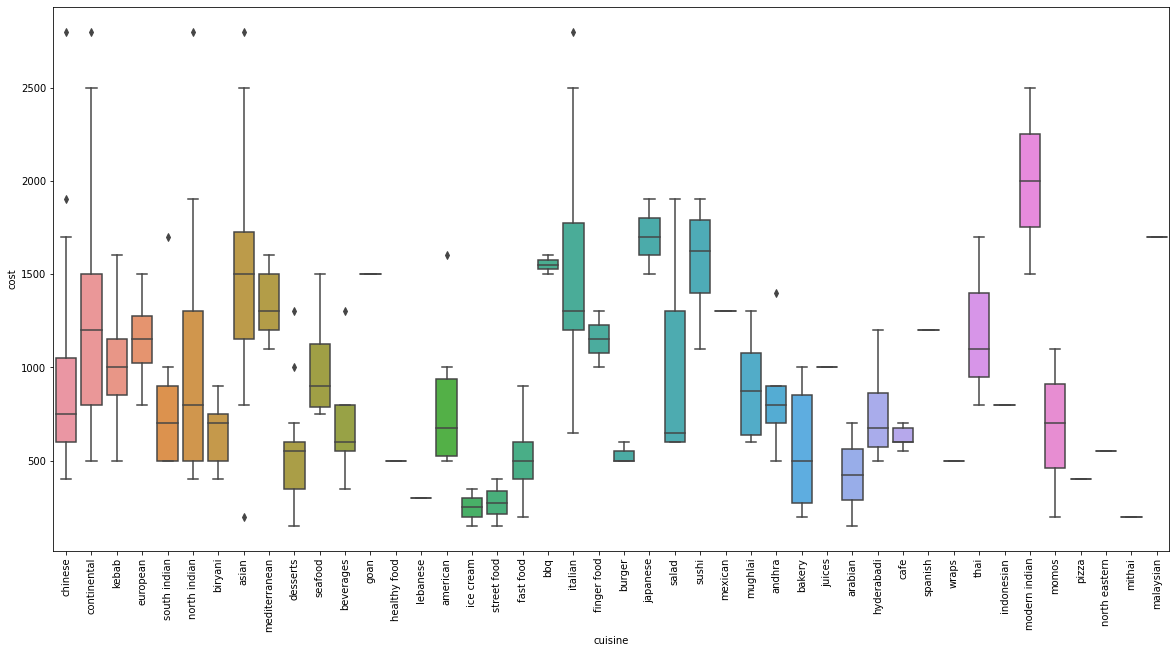

In [85]:
#creating an empty list cuisine and cost to store the cuisine and cost values.
cuisine = [] 
cost = []

#figure to plot it 
fig = plt.figure(figsize = (20,10))

#looping through the cuisine_price dictionary, and appends the cuisine and cost values to the respective lists.
for cus,cst in cuisine_price.items():
  
  #looping over cost of each cuisines
  for c in cst:
    #appending a cost and that specific cuisine in a list
    cuisine.append(cus)
    cost.append(c)

#creating a dataframe cuisine_cost using the lists cuisine and cost  
cuisine_cost = pd.DataFrame({'cuisine':cuisine, 'cost':cost})

#plotting a boxplot for cost distribution of each cuisine
sns.boxplot(x= 'cuisine', y = 'cost', data = cuisine_cost)

#xticks labelling
plt.xticks(rotation = 90)

*Cuisines like Modern Indian, Continental, Italian and Asian are highly priced cuisine whereas cuisines like ice cream, deserts, beverages, street food, fast food, arabin and bakery are lower priced cuisines* 

#### *Top 10 Cheapest Restaurant*

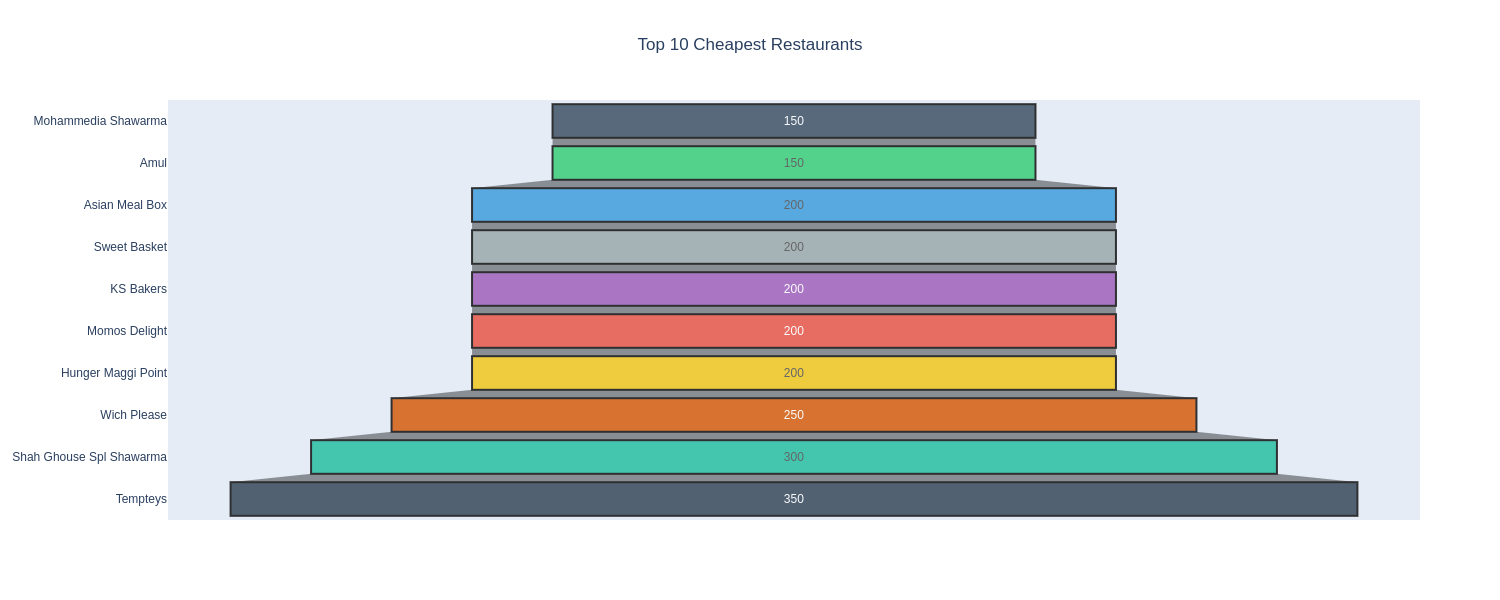

In [87]:
#finding top 10 cheapest restaurant 
top_10_cheapest_restaurant=restaurant_data.sort_values(by='Cost',ascending = True)[:10]

#converting restaurant name and cost in list to pass it to function
restaurant_names = top_10_cheapest_restaurant['Name'].tolist()
restaurant_costs = top_10_cheapest_restaurant['Cost'].tolist()

# Create a funnel chart
fig = go.Figure(data=[go.Funnel(
    y=restaurant_names,
    x=restaurant_costs,
    textfont=dict(size=12),
    opacity=0.8,
    marker=dict(
        color=["#34495e", "#2ecc71", "#3498db", "#95a5a6", "#9b59b6", "#e74c3c", "#f1c40f", "#d35400", "#1abc9c", "#2c3e50"],
        line=dict(color="#000000", width=2)
    )
)])

# Set chart layout and title
fig.update_layout(title="Top 10 Cheapest Restaurants", title_x=0.5)

# Show the chart
gitly.config_render('git', default_height = 600, default_width = 1500)
gitly.show( fig )

####*Top 10 expensive Restaurant* 

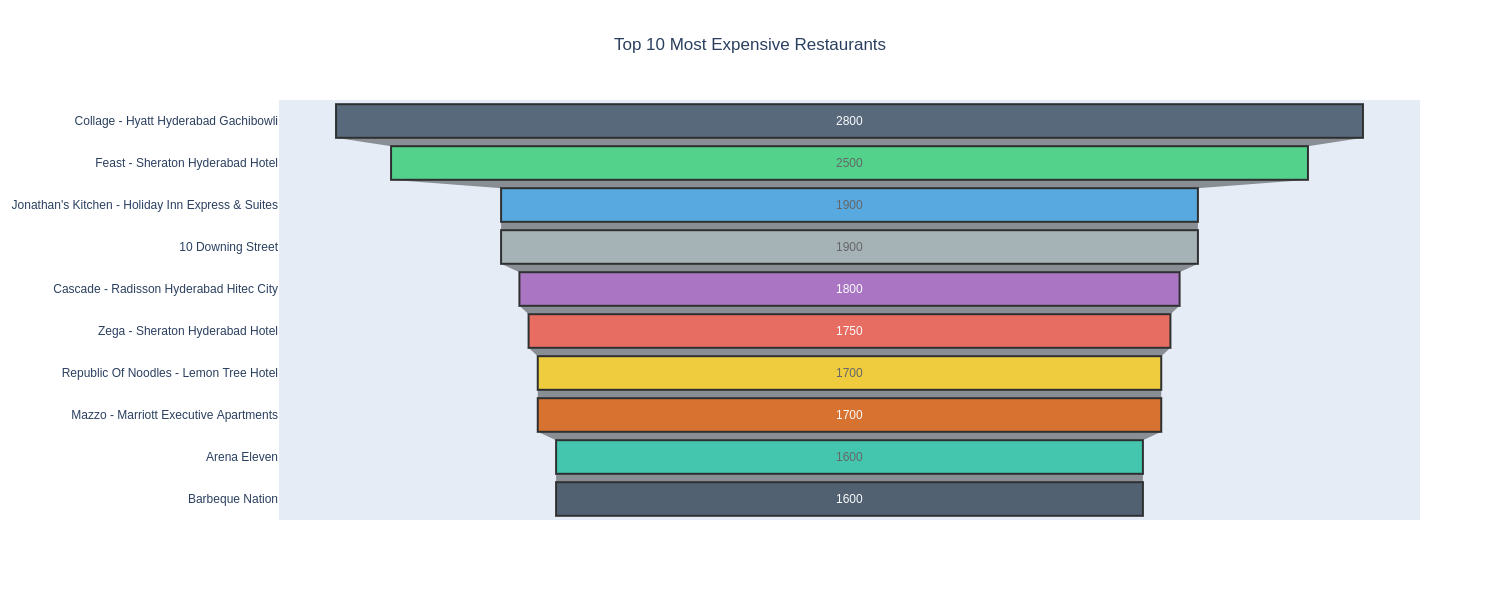

In [88]:
# Extract the names and costs of the top 10 most expensive restaurants
top_10_expensive_restaurant=restaurant_data.sort_values(by='Cost',ascending = False)[:10]

# Extract the names and costs of the top 10 most expensive restaurants
restaurant_names = top_10_expensive_restaurant['Name'].tolist()
restaurant_costs = top_10_expensive_restaurant['Cost'].tolist()

# Create a funnel chart
fig = go.Figure(data=[go.Funnel(
    y=restaurant_names,
    x=restaurant_costs,
    textfont=dict(size=12),
    opacity=0.8,
    marker=dict(
        color=["#34495e", "#2ecc71", "#3498db", "#95a5a6", "#9b59b6", "#e74c3c", "#f1c40f", "#d35400", "#1abc9c", "#2c3e50"],
        line=dict(color="#000000", width=2)
    )
)])

# Set chart layout and title
fig.update_layout(title="Top 10 Most Expensive Restaurants", title_x=0.5)

# Show the chart
gitly.config_render('git', default_height = 600, default_width = 1500)
gitly.show( fig )

## *Collections Related analysis*

#### *Extracting list of unique collections*

In [89]:
#this list will store collection values of each restaurant row
restaurants_collection= list(restaurant_data['Collections'].values)

#empty list to store the collections coming by spliting each row
collections_list=[]

#iterating over each collection row
for collection in restaurants_collection:

  #splitng a row data to seperste the collections of a restaurant in a row
  collections=collection.split(',')

  #adding those collections in collections_list
  collections_list.extend(collections)

#removing duplicate and extracting unique collections
unique_collections = unique_extract(collections_list)

#### *Dictionary with Collections as key and list of its restaurant as averaging value*

In [90]:
#creating a dictionary to store collection as a key and value as list of restaurants in that collection
collection_restaurant_dict ={}

#iterating over each collection in collction list
for element in unique_collections:

  #creating a empty list as values for dictionary keys
  collection_restaurant_dict[element]=[]

#looping over complete restaurant data
for i in range(len(restaurant_data)):

    #spliting collections of each restaurant
    collection_list=restaurant_data.iloc[i]['Collections'].split(',')
    
    #appending a restaurant in their specific collections
    for collection in collection_list:
      collection_restaurant_dict[collection].append(restaurant_data.iloc[i]['Name'])

#### *Unique Collection and the list of their prices*

In [91]:
# Create an empty dictionary to map unique collections to a list of costs associated with them
unique_collection_and_average_price={}

# Initialize the dictionary with keys as unique collections
for collection in unique_collections:
  unique_collection_and_average_price[collection]=[]

# Loop over the restaurant_data dataframe
for i in range(len(restaurant_data)):

  # Split the 'Collections' column into a list of collections
  collection_list=restaurant_data.iloc[i]['Collections'].split(',')
  
  # Loop through the list of collections
  for collection in collection_list:

    # Append the cost of the restaurant to the list of costs associated with the collection in the dictionary
    unique_collection_and_average_price[collection].append(restaurant_data.iloc[i]['Cost'])

#### *Unique Collection and their average prices*

In [92]:
#creating an empty list average_price_for_collection to store the average cost for each collection
average_price_for_collection=[]

# Loop through the values of the dictionary which is a list of costs associated with each collection
for avgprice in unique_collection_and_average_price.values():

  # Calculate the average price by taking the sum of the list and dividing by the length of the list and round it to 2 decimal place
  average_price_for_collection.append(round(sum(avgprice)/len(avgprice),2))

# Create a new dictionary where it maps the keys of the dictionary unique_collection_and_average_price to the values of the list average_price_for_collection
collection_avg_price=dict(zip(list(unique_collection_and_average_price.keys()),average_price_for_collection))

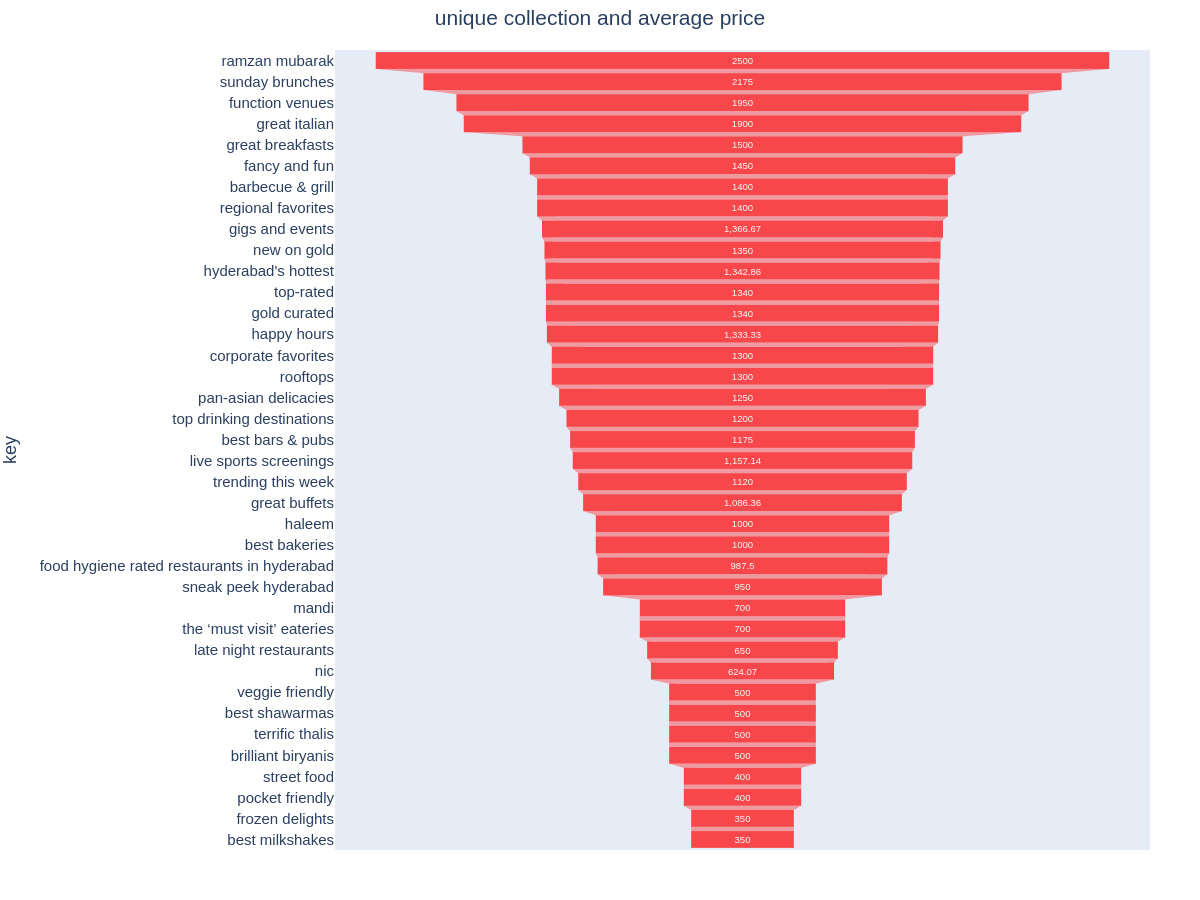

In [99]:
# Sort the dictionary collection_avg_price by values
sorted_average_price= dict(sorted(collection_avg_price.items(),key=lambda x: x[1],reverse=True))

# Create a dataframe containing the keys and values of the sorted dictionary
top_10_most_expensive_restaurant = pd.DataFrame({"key": sorted_average_price.keys(), "value": sorted_average_price.values()})

# Create the funnel chart
fig = px.funnel(top_10_most_expensive_restaurant, x="value", y="key",opacity=0.7)

# Customize the appearance
fig.update_layout(
    title="unique collection and average price",  # set the chart title
    title_x=0.5,  # set the x-position of the title
    font=dict(size=15),  # set the font size
    width=900,  # set the width of the chart
    height=1000,  # set the height of the chart
    margin=dict(l=50, r=50, t=50, b=50),  # set the margins
)
fig.update_traces(marker_color="red")
# Show the plot
gitly.config_render('git', default_height = 900, default_width = 1200)
gitly.show( fig )

#### *Unique Collections and their average rating*

In [100]:
'''This block will create a dictionary that will have collection name as key and list of average rating of the restaurants
   under that collection '''

#creating an empty dictionary called "unique_collection_and_their_ratings
unique_collection_and_their_ratings={}

#looping through a list of unique collections and adds each collection as a key to the dictionary with an empty list as its value
for collection in unique_collections:
  unique_collection_and_their_ratings[collection]=[]

#looping through the restaurant data by index and splits the 'Collections' column into a list of individual collections
for i in range(len(restaurant_data)):
  collection_list=restaurant_data.iloc[i]['Collections'].split(',')

  #For each collection in the collection_list, it appends the corresponding 'avg_rating' to the list of ratings for that collection in the "unique_collection_and_their_ratings" dictionary
  for collection in collection_list:
    unique_collection_and_their_ratings[collection].append(restaurant_data.iloc[i]['avg_rating'])

In [101]:
'''This block will take previous block dictionary and will create a dictionary that will contain collection name as key and their 
    average rating as value '''

#Initialize an empty list to store the average ratings for each collection
avg_rating=[]

# Iterate through the values (list of ratings) in the dictionary unique_collection_and_their_ratings
for average_rating in unique_collection_and_their_ratings.values():

#For each list of ratings, calculate the average by summing all the ratings and dividing by the number of ratings
  avg_rating.append(round(sum(average_rating)/len(average_rating),2))

# Create a new dictionary called collections_ratings by zipping together the keys (collection names) and values (average ratings)
collections_ratings=dict(zip(unique_collection_and_their_ratings.keys(),avg_rating))

In [102]:
#Initialize empty lists to store the collection and restaurant names
collections=[] 
Restaurant_Collection=[]

#iterating over a dictionary of collection and their restaurant dictionary
for collections_r, restaurants_coll in collection_restaurant_dict.items():
  
  #for each restaurant in specific collection we will append collection in collections and restaurants in restaurant collections
  for rest in restaurants_coll:    
    collections.append(collections_r) 
    Restaurant_Collection.append(rest)

#creating a dataframe of restaurant and collections
collection_restaurant=pd.DataFrame({'Collections':collections,'Restaurants':Restaurant_Collection})

#merging the average rating of each restaurant in created dataframe
collection_restaurant=pd.merge(collection_restaurant,restaurant_data[['avg_rating','Name']],how='inner',left_on='Restaurants',right_on='Name').rename(columns={'avg_rating':'restaurant_avg_rating'})
collection_restaurant.drop(columns='Name',inplace=True)

#creating a series from collection_ratings dictionary - collections and their average rating 
coll_avg_rating = pd.Series(collections_ratings).reset_index().rename(columns={'index':'Collections',0:'collection_avg_rating'})
avg_coll_rest = coll_avg_rating.merge(collection_restaurant,how='inner',on='Collections')

#droping nic as its not a part of collection
avg_coll_rest = avg_coll_rest[avg_coll_rest['Collections']!='nic']
avg_coll_rest

,Collections,collection_avg_rating,Restaurants,restaurant_avg_rating
0,food hygiene rated restaurants in hyderabad,4.00,Beyond Flavours,4.280
1,food hygiene rated restaurants in hyderabad,4.00,Over The Moon Brew Company,4.340
2,food hygiene rated restaurants in hyderabad,4.00,The Fisherman's Wharf,4.220
3,food hygiene rated restaurants in hyderabad,4.00,eat.fit,3.200
4,food hygiene rated restaurants in hyderabad,4.00,Yum Yum Tree - The Arabian Food Court,3.560
...,...,...,...,...
155,top drinking destinations,3.86,PourHouse7,3.860
156,best bakeries,3.92,Labonel,3.915
157,new on gold,3.95,Khaan Saab,3.800
158,new on gold,3.95,Arena Eleven,4.100


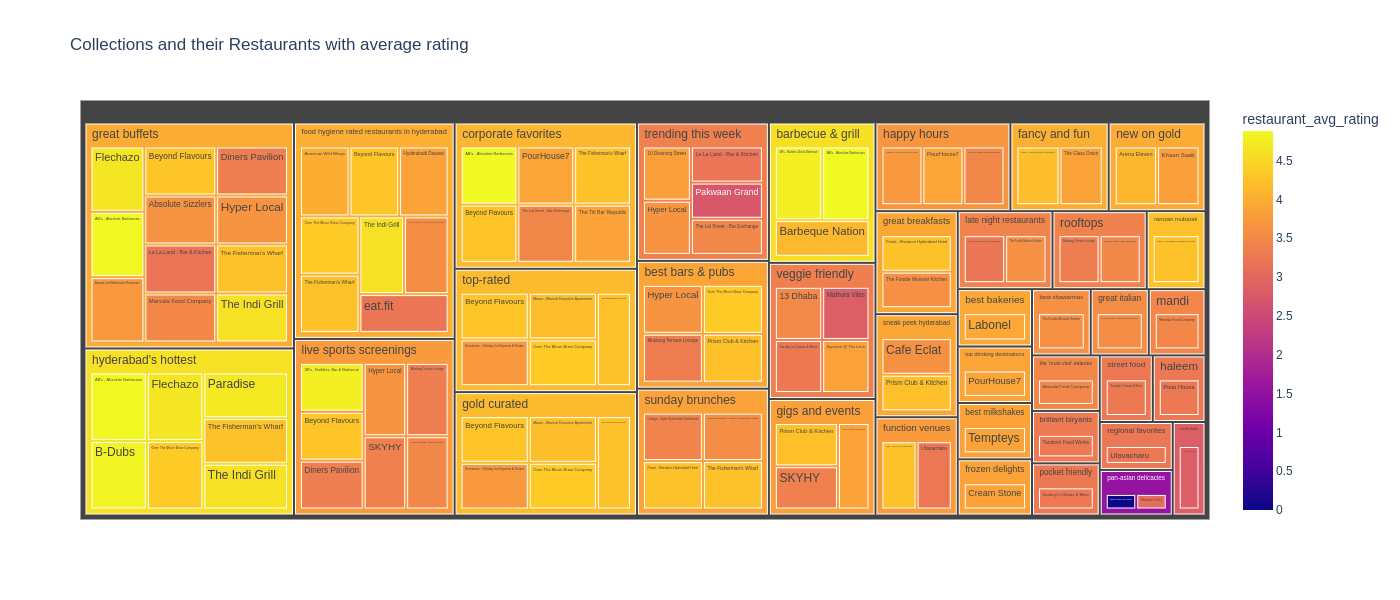

In [103]:
#plotting a treemap 
fig = px.treemap(avg_coll_rest, path=['Collections', 'Restaurants'], values='collection_avg_rating',
                color = 'restaurant_avg_rating', title='Collections and their Restaurants with average rating')

#updating height and width of layout 
fig.update_layout(width=1500, height=700)

#plotting a figure
gitly.config_render('git', default_height = 600, default_width = 1400)
gitly.show( fig )

## ***Review and Related analysis***

#### *Highly Rated Restaurant*

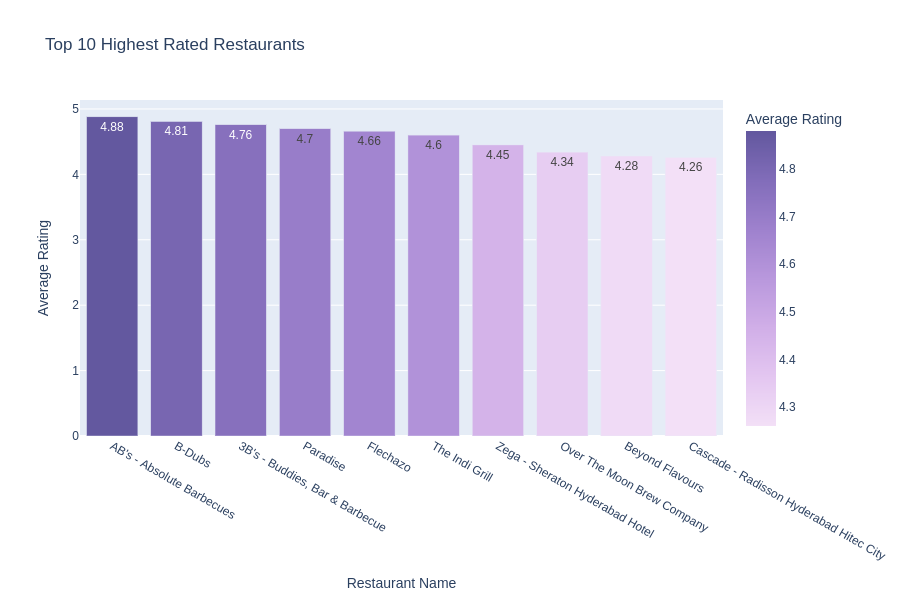

In [105]:
# Select the 'Name' and 'avg_rating' columns of the restaurant_data dataframe, sort the values based on 'avg_rating' in descending order and select the top 10 rows
highly_rated_restaurant=restaurant_data[['Name','avg_rating']].sort_values(by='avg_rating',ascending=False)[0:10]

# Create a bar chart using the Plotly Express library
fig = px.bar(highly_rated_restaurant, x='Name', y='avg_rating', text='avg_rating',
             title='Top 10 Highest Rated Restaurants', color='avg_rating',
              labels={'Name':'Restaurant Name', 'avg_rating':'Average Rating'},
             height=600, width=800, color_continuous_scale='Purp')

# show the plot
gitly.config_render('git', default_height = 600, default_width = 900)
gitly.show( fig )

*If you are looking in highly rated restaurants in Hyderabad then one can go for Absolute Barbecues, B-Dubs or 3B's restaurant*

#### *Reviews of Resturants*

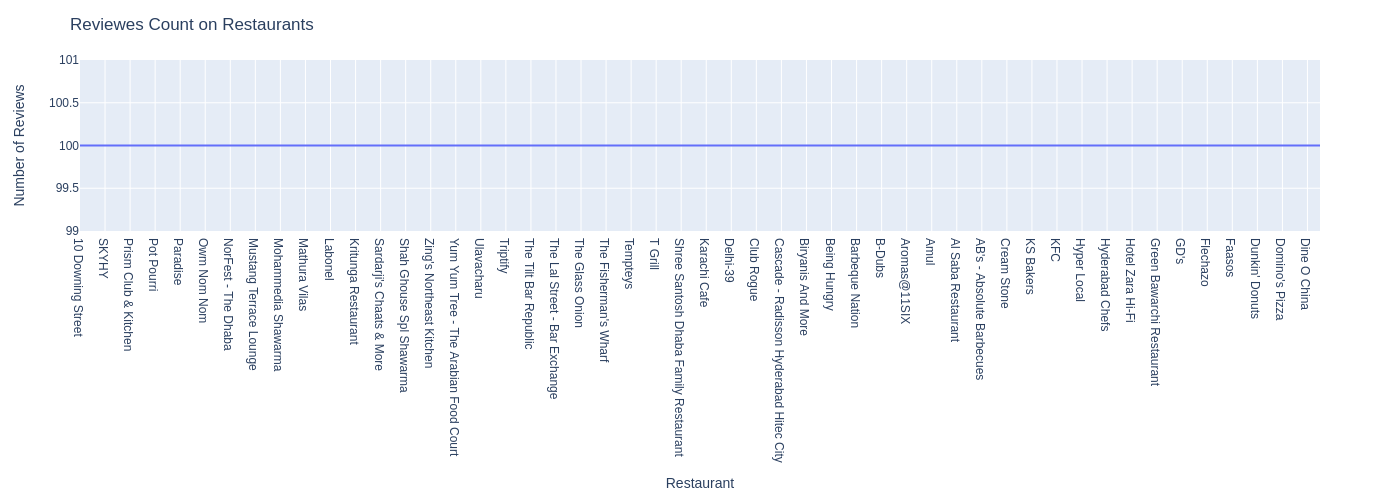

In [107]:
#Group the dataframe 'restaurant_review' by the column 'Restaurant' and aggregate the number of reviews for each restaurant using the 'count' function
review_count_resturant=restaurant_review.groupby('Restaurant').aggregate({'Review':'count'}).sort_values(by='Review',ascending=False)

#Create a line plot 
fig = px.line(review_count_resturant, x=review_count_resturant.index, y='Review')

#Update the layout of the plot by adding a title 'Top 10 Most Reviewed Restaurants', x-axis title 'Restaurant' and y-axis title 'Number of Reviews'
fig.update_layout(title='Reviewes Count on Restaurants', xaxis_title='Restaurant', yaxis_title='Number of Reviews')

#Show the plot
gitly.config_render('git', default_height = 500, default_width = 1400)
gitly.show( fig )

*Almost all the Restaurants nearly have same 100 reviews* 

####*Rating vs length of Review*

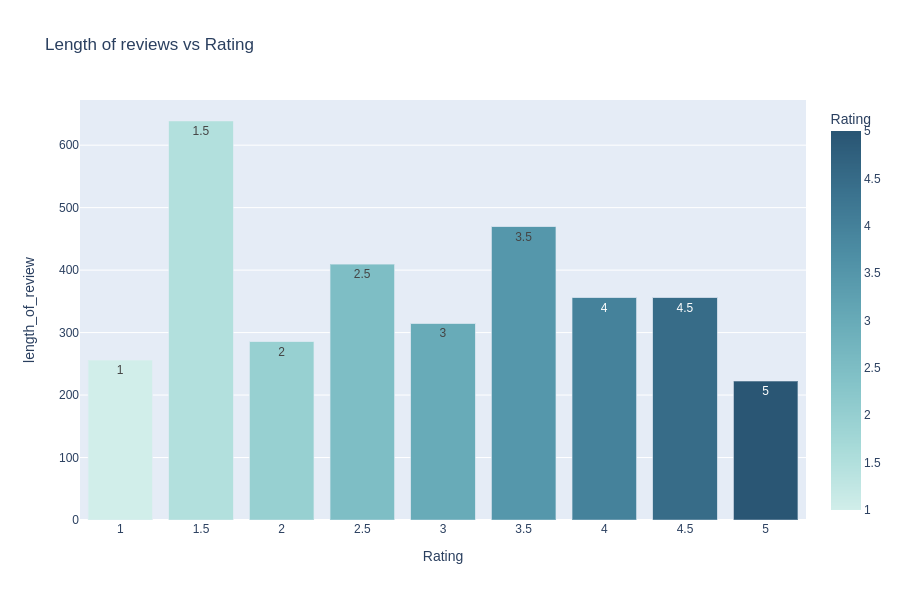

In [110]:
#Creating a new column in the dataframe 'restaurant_review' called 'length_of_review' which contains the length of each review in the 'Review' column
restaurant_review['length_of_review']=restaurant_review['Review'].apply(len)

# Group the dataframe 'restaurant_review' by the column 'Rating' and aggregate the mean of the 'length_of_review' column for each rating and Reset the index
rating_review=restaurant_review.groupby('Rating').agg({'length_of_review':'mean'}).reset_index()

# Create a bar chart using the library plotly express
fig = px.bar(rating_review, x='Rating', y='length_of_review', text='Rating',
             title='Length of reviews vs Rating', color='Rating',
             height=600, width=800, color_continuous_scale='Teal')

# show the plot
gitly.config_render('git', default_height = 600, default_width = 900)
gitly.show( fig )

*Unhappy users seems to be write long length reviews*

#### *Reviewer vs Count*

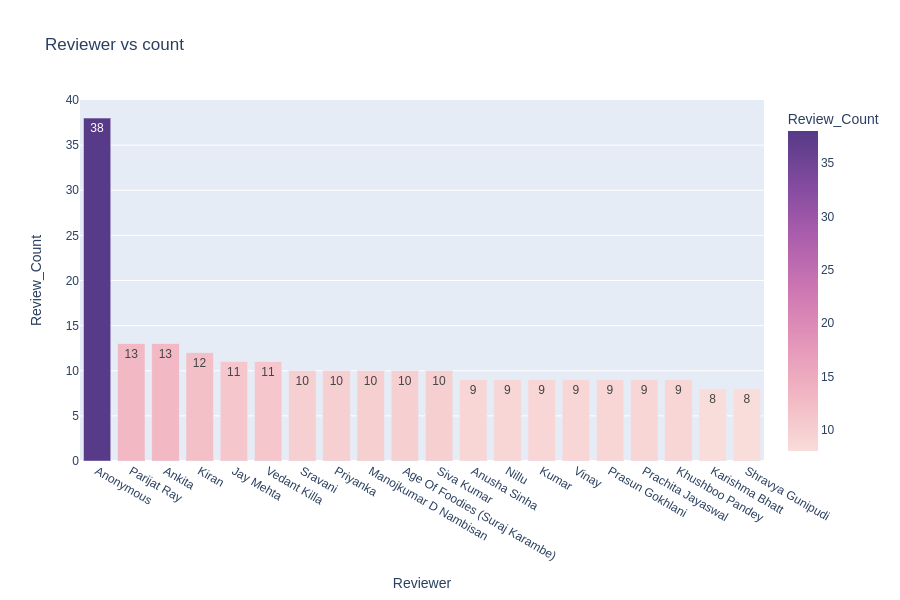

In [112]:
#group reviews by reviewer, count the number of reviews each has written, reset the index and name the new column 'Review_Count', and sort the resulting dataframe by review count in descending order
reviewer_list = restaurant_review.groupby('Reviewer').size().reset_index(name='Review_Count').sort_values(by=['Review_Count'],ascending=False)[:20]

# create a bar chart of top 20 reviewers and their review count
fig = px.bar(reviewer_list, x='Reviewer', y='Review_Count', text='Review_Count',
             title='Reviewer vs count', color='Review_Count',
             height=600, width=800, color_continuous_scale='Purpor')
gitly.config_render('git', default_height = 600, default_width = 900)
gitly.show( fig )

#### *Total reviews given by user*

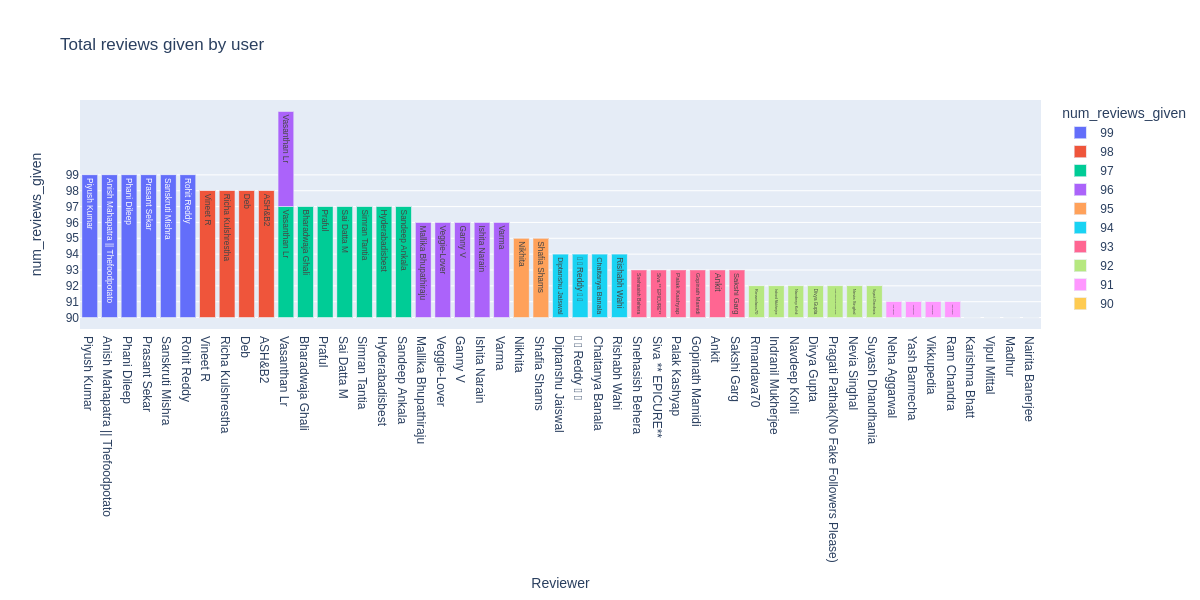

In [114]:
#maximum review given by user ,grouping restaurant_reviews df by reviewer,count the number of reviews given by each reviewer, rename the column to 'num_reviews_given', and reset the index
max_reviewer=restaurant_review.groupby(['Reviewer','num_reviews_given']).agg({'Reviewer':'count'}).rename(columns={'Reviewer':'count'}).reset_index()

# sort the dataframe by num_reviews_given in descending order and select top 50 reviewers
max_reviewer=max_reviewer.drop(columns='count').sort_values(by='num_reviews_given',ascending=False)[:50]

# create a bar chart of top 50 reviewers and their num_reviews_given
fig = px.bar(max_reviewer, x='Reviewer', y='num_reviews_given', text='Reviewer',
             title='Total reviews given by user', color='num_reviews_given',
             height=800, width=1000, color_continuous_scale='Purpor')

# show the chart
gitly.config_render('git', default_height = 600, default_width = 1200)
gitly.show( fig )

#### *Count of Reviews in each Year*

In [115]:
#cconversion of time into datetime
restaurant_review['Time']=pd.to_datetime(restaurant_review['Time'])

# Extract year from the 'Time' column and create a new 'Year' column
restaurant_review['Year'] = pd.DatetimeIndex(restaurant_review['Time']).year

# Extract hour from the 'Time' column and create a new 'Hour' column
restaurant_review['Hour'] = pd.DatetimeIndex(restaurant_review['Time']).hour

In [116]:
restaurant_review.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,num_reviews_given,followers,length_of_review,Year,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,222,2019,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,144,2019,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,189,2019,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,148,2019,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,160,2019,21


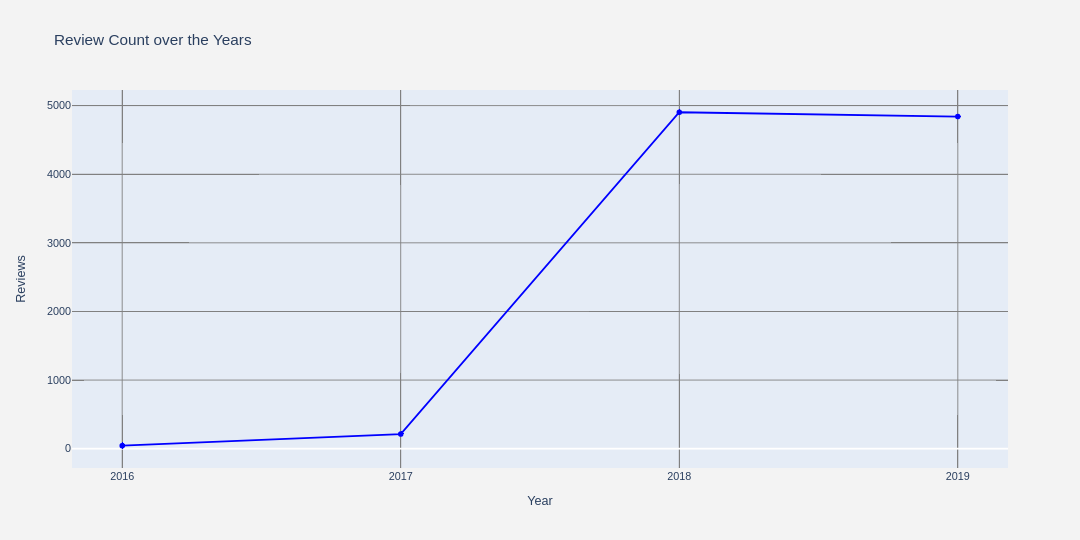

In [123]:
# Extract first 4 characters of the 'Year' column and convert it to string
restaurant_review['Year'] = restaurant_review['Year'].astype(str).str[:4]

# Group by 'Year' column and count the number of reviews in each year
review_year=restaurant_review.groupby('Year').agg({'Review':'count'}).reset_index()

# Create a scatter plot using the extracted data
fig = go.Figure(data=go.Scatter(x=review_year['Year'], y=review_year['Review'],line=dict(color='blue', width=2)))

# Create a scatter plot using the extracted data
fig.update_layout(title='Review Count over the Years',
                  xaxis_title='Year',
                  yaxis_title='Reviews',
                  paper_bgcolor='rgb(243, 243, 243)',
                  xaxis=dict(showgrid=True, gridcolor='gray'),
                  yaxis=dict(showgrid=True, gridcolor='gray'),
                  width=900,
                  height=600)
# Show the plot
gitly.config_render('git', default_height = 600, default_width = 1200)
gitly.show(fig, scale=0.9)

*We can see the there are near to no reviews and very low reviews in year 2016 and 2017 respectively whereas we can see a high surge in number of reviews over a year from 2018*  

#### *Number of reviews by each hour of day*

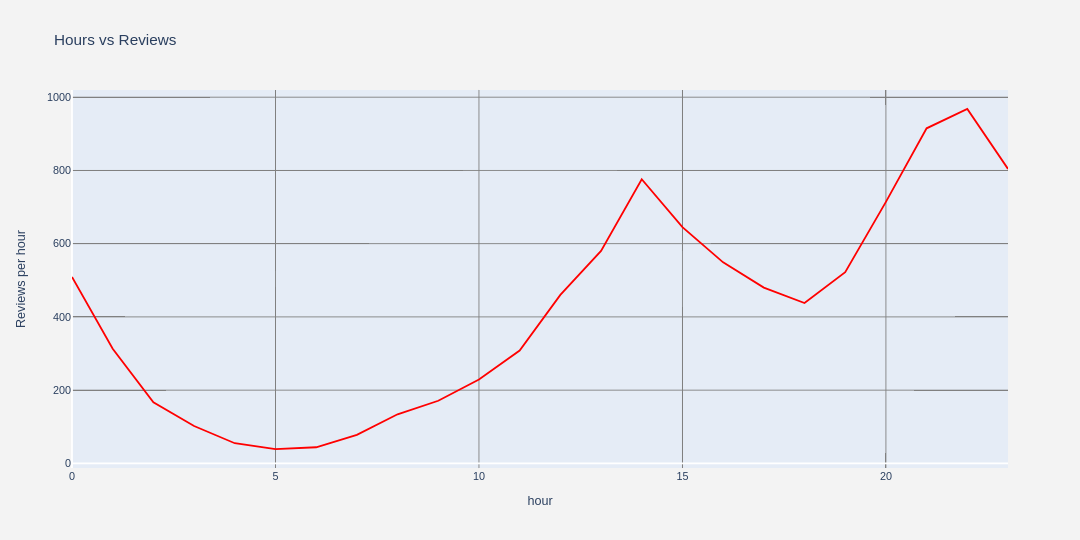

In [125]:
# group by 'Hour' column and count the number of reviews per hour
reviews_hours=restaurant_review.groupby('Hour').agg({'Hour':'count'}).rename(columns={'Hour':'Reviews per hour'}).reset_index()

# Create a scatter plot using the extracted data
fig = go.Figure(data=go.Scatter(x=reviews_hours['Hour'], y=reviews_hours['Reviews per hour'],line=dict(color='red', width=2)))

# Update the layout of the plot
fig.update_layout(title='Hours vs Reviews',
                  xaxis_title='hour',
                  yaxis_title='Reviews per hour',
                  paper_bgcolor='rgb(243, 243, 243)',
                  xaxis=dict(showgrid=True, gridcolor='gray'),
                  yaxis=dict(showgrid=True, gridcolor='gray'),
                  width=900,
                  height=600)
# Show the plot
gitly.config_render('git')
gitly.show( fig ,scale=0.9)

*We can see that number of reviews are surging at afternoon and at night.Thats what is our lunch and dinner time*

## *Conclusions of Exploratory Data analysis*

Five restaurants - IndiBlaze,Sweet Basket, Anngaara counts 3,Wich please and Republic of noodles - The Lemon Tree hotel don't have any reviews yet


North Indian, Chineese, Continental and Biryani are some of the famous cuisines in Hyderabad as it is served by most number of restaurant

Modern Indian, Malasiyan, Japneese and Sushi are among the highly priced cuisines whereas cuisines like pizza's, strret food, fast food, Wraps are among cheapest cuisine in Hyderabad restaurants 

Most of the restaurants in a city costs somewhere between 300 -1800

Mohammedia Shwarma, Asian meal box, KS bakers and momos delight are among top 10 Cheapest restaurant whereas Hyatt Hyderabad, Feast -Shreaton, Jonathan's Kitchen are among most expensive restaurant in Hyderabad

Absolute Barbecues, B-Dubs or 3B's restaurant are among highly rated restaursants in a city

## *Text Preprocessing*

In [126]:
def preprocess_text(text):
  '''This function takes text as a input and performs basic cleaning like lowering case, removing stopwords and performing lemmitization'''

  # Lowercase the text
  text=text.lower()

  #converting emoji into text
  text=emoji.demojize(text)
  
  #remove special character and punctuation
  text=re.sub(r"[^a-zA-Z0-9]", " ", text)
  
  # Tokenize the text
  tokens=word_tokenize(text)
  
  # negative words that needs to be removed from corpus of stopwords
  negations = ["weren't", 'wasn\'t', 'isn\'t', 'wouldn\'t', 
             'shouldn\'t', 'couldn\'t', 'not', 'don\'t', 'doesn\'t', 'didn\'t', 
             "aren't","hadn't","hasn't","haven't","mightn't","mustn't","needn't",'no', 'neither','nor']
  stop_words = set(stopwords.words("english"))-set(negations)
  
  #removing stopwords from text
  filtered_tokens = [token for token in tokens if token not in stop_words]
  
  # Lemmatize the tokens
  lemmatizer=WordNetLemmatizer()
  lemmatized_tokens=[lemmatizer.lemmatize(token)for token in filtered_tokens]
  
  # Join the tokens back into a single string
  preprocessed_text =' '.join(lemmatized_tokens)
  
  #return preprocessed text
  return preprocessed_text

In [127]:
#applying the preprocess_text function 
restaurant_review['clean_review']=restaurant_review['Review'].apply(preprocess_text)

## *Most Frequently appearing words in review data*

In [128]:
def Freq_df(sentences):
    # Tokenize the sentences into words
    words = [word_tokenize(sentence) for sentence in sentences]
    
    # Flatten the list of words
    words = [word for sublist in words for word in sublist]
    
    # Create a frequency distribution of the words
    Freq_dist_nltk = nltk.FreqDist(words)
    
    # Create a dataframe from the frequency distribution
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    
    # Rename the column as 'Frequency'
    df_freq.columns = ['Frequency']
    
    # Rename the index as 'Term'
    df_freq.index.name = 'Term'
    
    # Sort the dataframe by frequency in descending order
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    
    # Reset the index
    df_freq = df_freq.reset_index()
    
    # Set the index as 'Term'
    df_freq=df_freq.set_index('Term')
    return df_freq

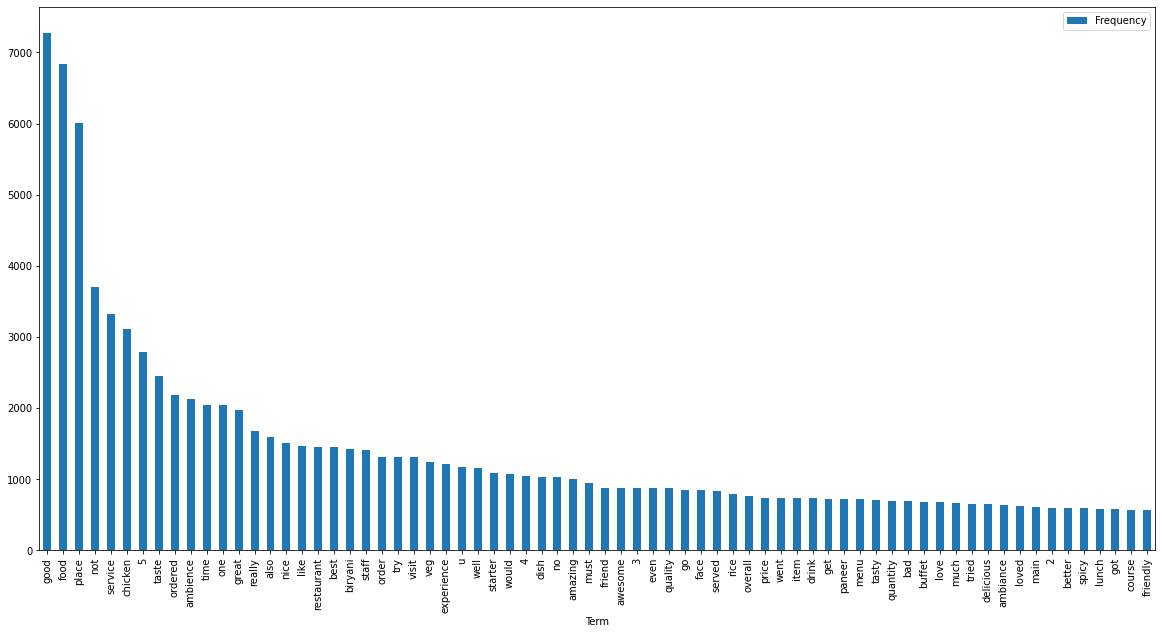

In [129]:
# Create a frequency distribution dataframe of the words in the 'clean_review' column of the restaurant_review dataframe
count_of_words=Freq_df(restaurant_review['clean_review'])

# Plot the top 70 words in the frequency distribution dataframe
count_of_words[0:70].plot.bar(figsize=(20,10))

# Display the plot
plt.show()

In [130]:
# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Add a new column called 'sentiment_score' The sentiment score is calculated by applying the polarity_scores method of the SentimentIntensityAnalyzer on the 'clean_review' column
restaurant_review['sentiment_score'] =restaurant_review['clean_review'].apply(lambda x: sia.polarity_scores(x)["compound"])

In [131]:
restaurant_review.head(5)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,num_reviews_given,followers,length_of_review,Year,Hour,clean_review,sentiment_score
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,222,2019,15,ambience good food quite good saturday lunch c...,0.9669
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,144,2019,14,ambience good pleasant evening service prompt ...,0.9360
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,189,2019,22,must try great food great ambience thnx servic...,0.9186
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,148,2019,22,soumen da arun great guy behavior sincerety go...,0.8591
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,160,2019,21,food good ordered kodi drumstick basket mutton...,0.9432


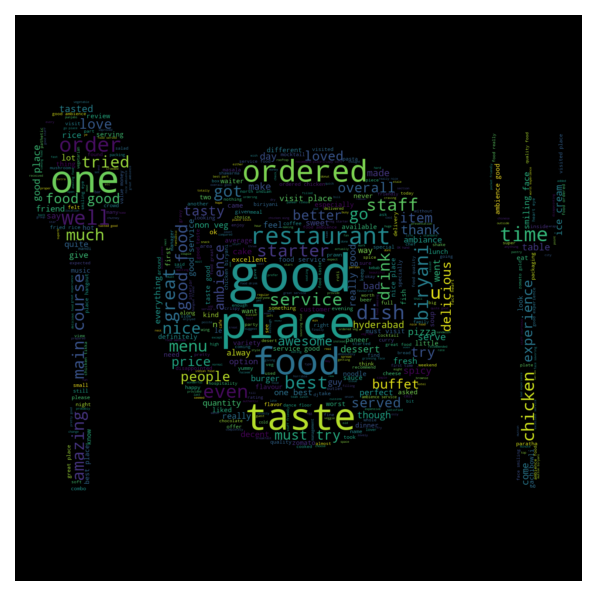

In [132]:
# Create a set of stopwords
stopwords = set(STOPWORDS)
# Join all the reviews in the 'clean_review' column into a single string
text = " ".join(review for review in restaurant_review['clean_review'].astype(str))
# Create a mask image by opening an image file
mask = np.array(Image.open("/content/drive/MyDrive/Datascience/Datasets/a-plate-with-a-spoon-and-fork_1527405.jpeg"))
# Create a wordcloud with specified stopwords, background color, max number of words, mask, width and height
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=500, mask=mask,width=800, height=500).generate(text)
# Create a figure with a specified size
plt.figure(figsize=(15, 5),dpi=150)
# Display the wordcloud using the imshow method
plt.imshow(wordcloud, interpolation="bilinear")
# Remove axis
plt.axis("off")
# Save the wordcloud as an image file
plt.savefig("bowl.png", format="png")
# Show the plot
plt.show()

## *Review feature Creation in restaurant data*

In [133]:
def review_list(rest_name):
  '''This function takes in a restaurant name as input and returns the combined reviews for that restaurant'''
  
  #if the restaurant is present in the 'restaurant_review' dataframe. If the restaurant is not present, it returns an empty string.
  if rest_name in list(restaurant_review['Restaurant']):
    
    # If present, filter the dataframe to only include rows where the 'Restaurant' column matches the input name
     review = list(restaurant_review[restaurant_review['Restaurant']==rest_name]['clean_review'])
     
     # Join all the reviews for that restaurant and return as a single string
     review = ' '.join(review)
     
     # If the restaurant is not present in the dataframe, return an empty string
     
     return review
  
  #if there is no review for restaurant fill empty spaces for the restaurant
  else:
    return ''

In [134]:
#applying the review_list function 
restaurant_data['reviews'] = restaurant_data['Name'].apply(review_list)

## *Feature engineering on text data*

In [135]:
'''This function takes in a list of sentences as input and returns a DataFrame containing the TF-IDF values for each sentence.'''
def tfidf(sentences):
  # Initialize the TfidfVectorizer object
  tv = TfidfVectorizer()
  
  # Fit the TfidfVectorizer to the input sentences and convert the result to an array
  rev_arr = tv.fit_transform(sentences).toarray()
  
  # Convert the array to a DataFrame
  rev_arr = pd.DataFrame(rev_arr)
  
  # Return the DataFrame
  return rev_arr

In [136]:
#This code creates a variable 'tfidf_matrix' which stores the TF-IDF values for the reviews present in the 'reviews' column of the 'restaurant_data' dataframe.
tfidf_matrix = tfidf(restaurant_data['reviews'])

In [137]:
#shape of tfidf matrix
tfidf_matrix.shape

(105, 13754)

## *Calculating cosine similarities*

In [138]:
#This code creates a variable 'cosine_similarities' which stores the cosine similarity values between all the reviews present in the 'reviews' column of the 'restaurant_data' dataframe.
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [139]:
restaurant_data.head(1)

,Name,Links,Cost,Collections,Cuisines,Timings,avg_rating,reviews
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"food hygiene rated restaurants in hyderabad,co...","chinese,continental,kebab,european,south india...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,ambience good food quite good saturday lunch c...


In [140]:
# Find the index of the restaurant 'Beyond Flavours'
restaurant_data[restaurant_data['Name'] == 'Beyond Flavours'].index[0]

# Get the cosine similarity scores for the first restaurant (index 0) and Sorting the scores in descending order
score_series = pd.Series(cosine_similarities[0]).sort_values(ascending=False)

score_series 

0      1.000000
53     0.611345
79     0.594490
30     0.586727
1      0.571025
         ...   
100    0.000000
101    0.000000
102    0.000000
103    0.000000
104    0.000000
Length: 105, dtype: float64

## *Building a Recommender System*

In [141]:
def recommend(name, cosine_similarities = cosine_similarities):
    '''
    The function takes in a restaurant name and cosine similarities matrix, and returns top 10 similar restaurants based on cosine similarity score
    '''
    recommend_restaurant = []
    
    # Find the index of the restaurant entered
    idx = restaurant_data[restaurant_data['Name'] == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)

    #Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(each)
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Name','Cuisines', 'avg_rating', 'Cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(restaurant_data[['Name','Cuisines','avg_rating', 'Cost']][restaurant_data.index == each]))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.sort_values(by='avg_rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [142]:
recommend("Triptify")

TOP 10 RESTAURANTS LIKE Triptify WITH SIMILAR REVIEWS: 


,Name,Cuisines,avg_rating,Cost
16,NorFest - The Dhaba,north indian,4.03,550.0
38,The Glass Onion,"north indian,continental,italian,asian",3.83,1200.0
39,Deli 9 Bistro,"cafe,continental,desserts",3.82,700.0
64,Hyderabad Chefs,"north indian,chinese",3.81,600.0
78,Khaan Saab,"north indian,mughlai",3.80,1100.0
79,Olive Garden,"north indian,chinese,continental,biryani",3.76,700.0
75,Royal Spicy Restaurant,"north indian,south indian",3.74,700.0
36,Banana Leaf Multicuisine Restaurant,"biryani,south indian,north indian,chinese,andhra",3.69,700.0
57,Being Hungry,"north indian,chinese",3.66,450.0
40,Frio Bistro,"european,italian,continental,spanish",3.61,1200.0


# *Thank You*